In [1]:
import numpy as np
import mylibrary.nnlib as tnn
import mylibrary.splinelib as tsp
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import matplotlib

matplotlib.rcParams['figure.figsize'] = (12, 8)

In [2]:
num_points = 50
X1 = np.linspace(-2.5, 1.5, num_points)
X2 = np.linspace(-2, 4, num_points)
X1, X2 = np.meshgrid(X1, X2)
X1 = X1.reshape(-1)
X2 = X2.reshape(-1)
Y = np.sin(np.sqrt(X1**2 + X2**2))*2-1.

%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

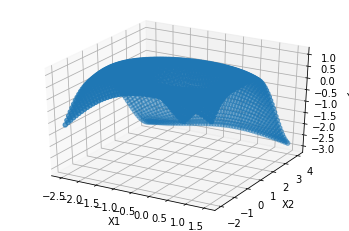

In [3]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

### Using Neural Network 1-hidden unit

In [32]:
%matplotlib tk
xx = np.c_[X1, X2]
yy = Y.reshape(-1,1)

n_hidden = 1
net = tnn.AutoForm(new_layers=True)
layer1 = tnn.NonLinearLayer(2, n_hidden, activation=tnn.Relu(), optimizer=tnn.Adam())
layer2 = tnn.LinearLayer(n_hidden, 1, optimizer=tnn.Adam())


fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  6.07323713844812


100 Error =  1.283800823406971


200 Error =  1.2693488808701645


300 Error =  1.2334926280750647


400 Error =  1.1486870039850599


500 Error =  0.8646303793639288


600 Error =  0.6231134026980346


700 Error =  0.5758356472928097


800 Error =  0.5645103598098193


900 Error =  0.561051602215043


1000 Error =  0.5598056197461603


1100 Error =  0.5592945747216119


1200 Error =  0.5590672414792472


1300 Error =  0.5589680238557472


1400 Error =  0.5589109385651484


1500 Error =  0.5588770549982898


1600 Error =  0.5588559341170568


1700 Error =  0.5588480795992838


1800 Error =  0.558842155429142


1900 Error =  0.5588373069587903


2000 Error =  0.5588367795632423


2100 Error =  0.55883676898572


2200 Error =  0.558836768960818


TclError: invalid command name "pyimage208"

In [5]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

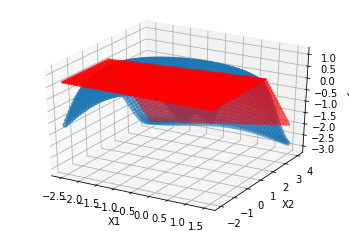

In [6]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

## Using multiple hidden units (relu pieces)

In [36]:
%matplotlib tk
xx = np.c_[X1, X2]
yy = Y.reshape(-1,1)

n_hidden = 3
net = tnn.AutoForm(new_layers=True)
layer1 = tnn.NonLinearLayer(2, n_hidden, activation=tnn.Relu(), optimizer=tnn.Adam())
layer2 = tnn.LinearLayer(n_hidden, 1, optimizer=tnn.Adam())


fig = plt.figure()
ax = fig.gca(projection='3d')

for epoch in range(100000):
    yout = net.forward(xx)
    dy = yout - yy
#     print(dy.shape, yout.shape, yy.shape)
    dx = net.backward(dy)
    
    net.update()
    
    if epoch%100 == 0:
        error = (dy**2).mean()
        print(epoch, 'Error = ', error)
        ax.clear()
        
        ax.scatter(X1, X2, Y)
        ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
        ax.set_xlabel('X1')
        ax.set_ylabel('X2')
        ax.set_zlabel('Y')
        
        fig.canvas.draw()
        plt.pause(0.01)
        print("\n")
        if error < 0.00025:
            print('fitted to our expectation')
            break

0 Error =  1.2184229814672285


100 Error =  0.2003188500586915


200 Error =  0.14027193940898638


300 Error =  0.11811519337958261


400 Error =  0.11355085786459813


500 Error =  0.11127656931508324


600 Error =  0.11027152303439634


700 Error =  0.10984094082710542


800 Error =  0.1096959491875433


900 Error =  0.10962190899562074


1000 Error =  0.10960361134910938


1100 Error =  0.1096008787488499


1200 Error =  0.10959139200157149


1300 Error =  0.10958206414691501


1400 Error =  0.10957842226635194


1500 Error =  0.10957799374732777


1600 Error =  0.10957799571271178


1700 Error =  0.10957799374648527


1800 Error =  0.10957799459262577


1900 Error =  0.10957799502116397


2000 Error =  0.10957799422721698


2100 Error =  0.10957799373345135


2200 Error =  0.10957799354318475


2300 Error =  0.10957799523504734


2400 Error =  0.10957799408958958


2500 Error =  0.10957799545732708


2600 Error =  0.10957799408028024


2700 Error =  0.10957799514403725


2800 Err

TclError: invalid command name "pyimage248"

In [12]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

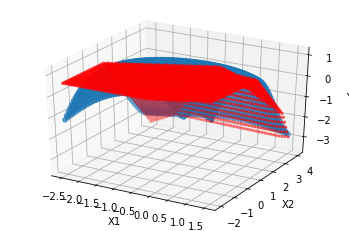

In [37]:
%matplotlib inline
fig = plt.figure()
ax = fig.gca(projection='3d')
ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()

In [38]:
outs = []
for i in range(n_hidden):
    out = layer1.output[:, i]*layer2.weights[i]
    outs.append(out)

In [39]:
%matplotlib tk
fig = plt.figure()
ax = fig.gca(projection='3d')
# ax.scatter(X1, X2, Y)
ax.scatter(X1, X2, yout.reshape(-1), color='r', marker='.')
for i, out in enumerate(outs):
    ax.scatter(X1, X2, out.reshape(-1), color='g', marker='.', label=f'X,y_{i}')
#     plt.plot(x, out, c='m', lw=1, label=f'x,y_{i}')
    
ax.set_xlabel('X1')
ax.set_ylabel('X2')
ax.set_zlabel('Y')
plt.show()